# Diamond Data Exploration

This document explores a dataset containing prices and attributes for approximately 54,000 round-cut diamonds.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### A little preliminary Data Wrangling

In [9]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('./diamonds.csv')

In [10]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
print(diamonds.head(10))

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object
   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338

In [11]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

In [12]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Structure of the dataset

There are 53,940 diamonds in the dataset with 10 features (carat, cut, color, clarity, depth, table, price, x, y, and z). Most variables are numeric in nature, but the variables cut, color, and clarity are ordered factor variables with the following levels.

(worst) ——> (best) <br>
cut: Fair, Good, Very Good, Premium, Ideal <br>
color: J, I, H, G, F, E, D <br>
clarity: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF

## Univariate Exploration

Let's start the exploration by looking at the main variable of interest: price.

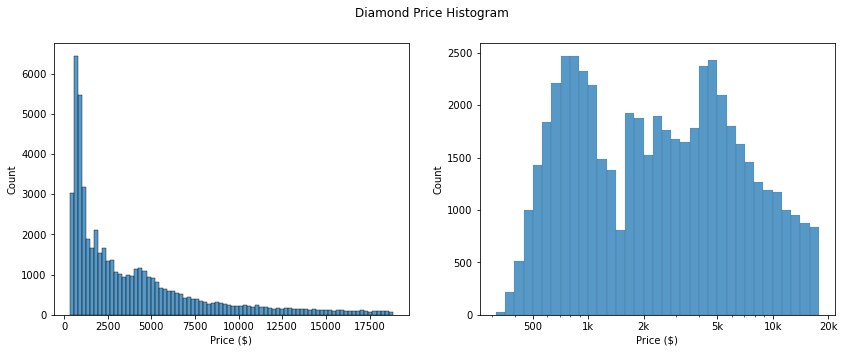

In [13]:
# univariate plot of diamond prices

# Plot size and title
plt.figure(figsize = [14, 5]) 
plt.suptitle('Diamond Price Histogram')

# Default Seaborn histogram plot
plt.subplot(1,2,1)
sb.histplot(diamonds['price'], kde=False);
plt.xlabel('Price ($)')

# Seaborn plot with log scale for price and adjusted bin size
plt.subplot(1,2,2)

# log transform of bins
bins = 10 ** np.arange(2.5, 4.3, 0.05)
sb.histplot(diamonds['price'],bins = bins, kde=False)
# Log Scale for Price
plt.xscale('log')
# Create xticks and labels
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Price ($)');

Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.

Under a log scale, the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

Next, we'll create a plot of our first diamond 'C' metric: carat weight.

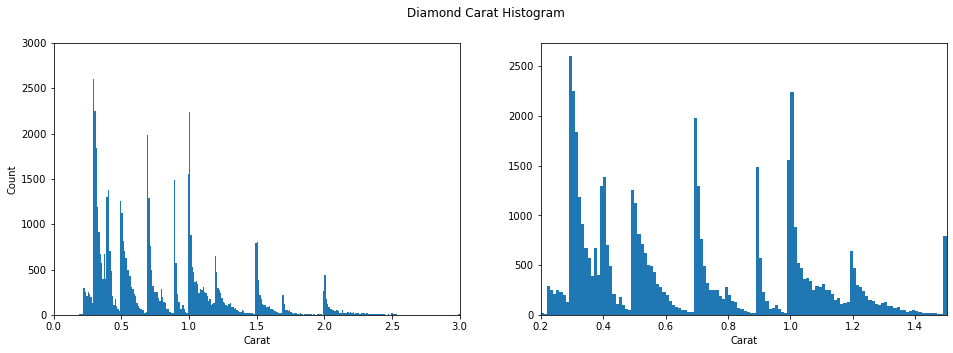

In [14]:
# univariate plot of carat weights

plt.figure(figsize=[16, 5])
plt.suptitle('Diamond Carat Histogram')

plt.subplot(1,2,1)
bins = np.arange(0.15, diamonds['carat'].max()+0.1, 0.01)
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim(0,3)
plt.xlabel('Carat')
plt.ylim(0,3000)
plt.ylabel('Count')

# investigating further on an even smaller bin size
plt.subplot(1,2,2)
bins = np.arange(0.2, 1.51, 0.01)
plt.hist(data = diamonds, x = 'carat', bins = bins)
plt.xlim([0.2,1.5])
plt.xlabel('Carat');

In the case of carat, the small bin size proves illuminating. There are very large spikes in frequency at the bars with one digit of precision (e.g. 0.3, 0.7, 1.0); frequency quickly trails off until the next spike. These probably represent standard diamond sizes for use in jewelry.

I'll now move on to the other 'c' variables in the dataset: cut, color, and clarity.

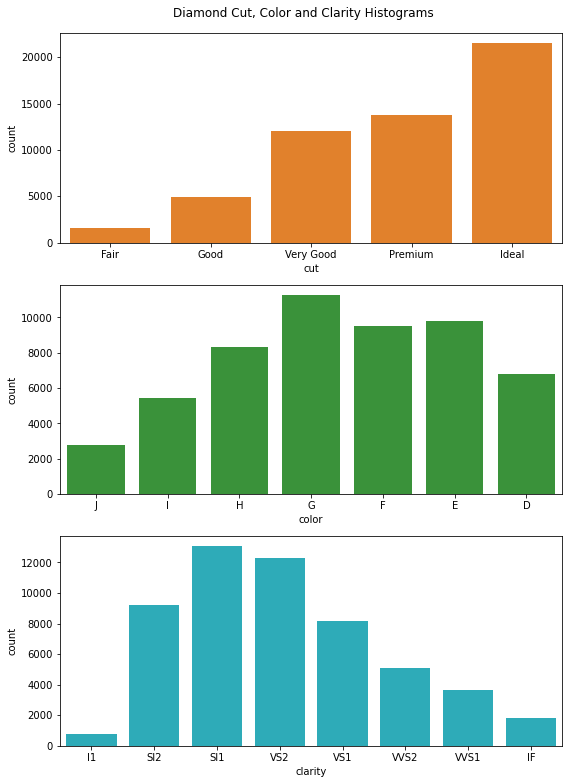

In [15]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [9,12])
fig.subplots_adjust(top=.95)
fig.suptitle('Diamond Cut, Color and Clarity Histograms')

sb.countplot(data = diamonds, x = 'cut', color = sb.color_palette()[1], ax = ax[0])
sb.countplot(data = diamonds, x = 'color', color = sb.color_palette()[2], ax = ax[1])
sb.countplot(data = diamonds, x = 'clarity', color = sb.color_palette()[9], ax = ax[2]);

The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

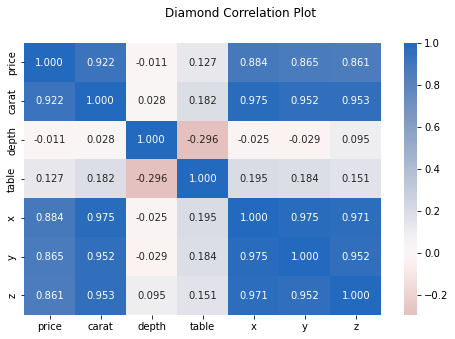

In [16]:
numeric_vars = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categoric_vars = ['cut', 'color', 'clarity']

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(diamonds[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.suptitle('Diamond Correlation Plot');

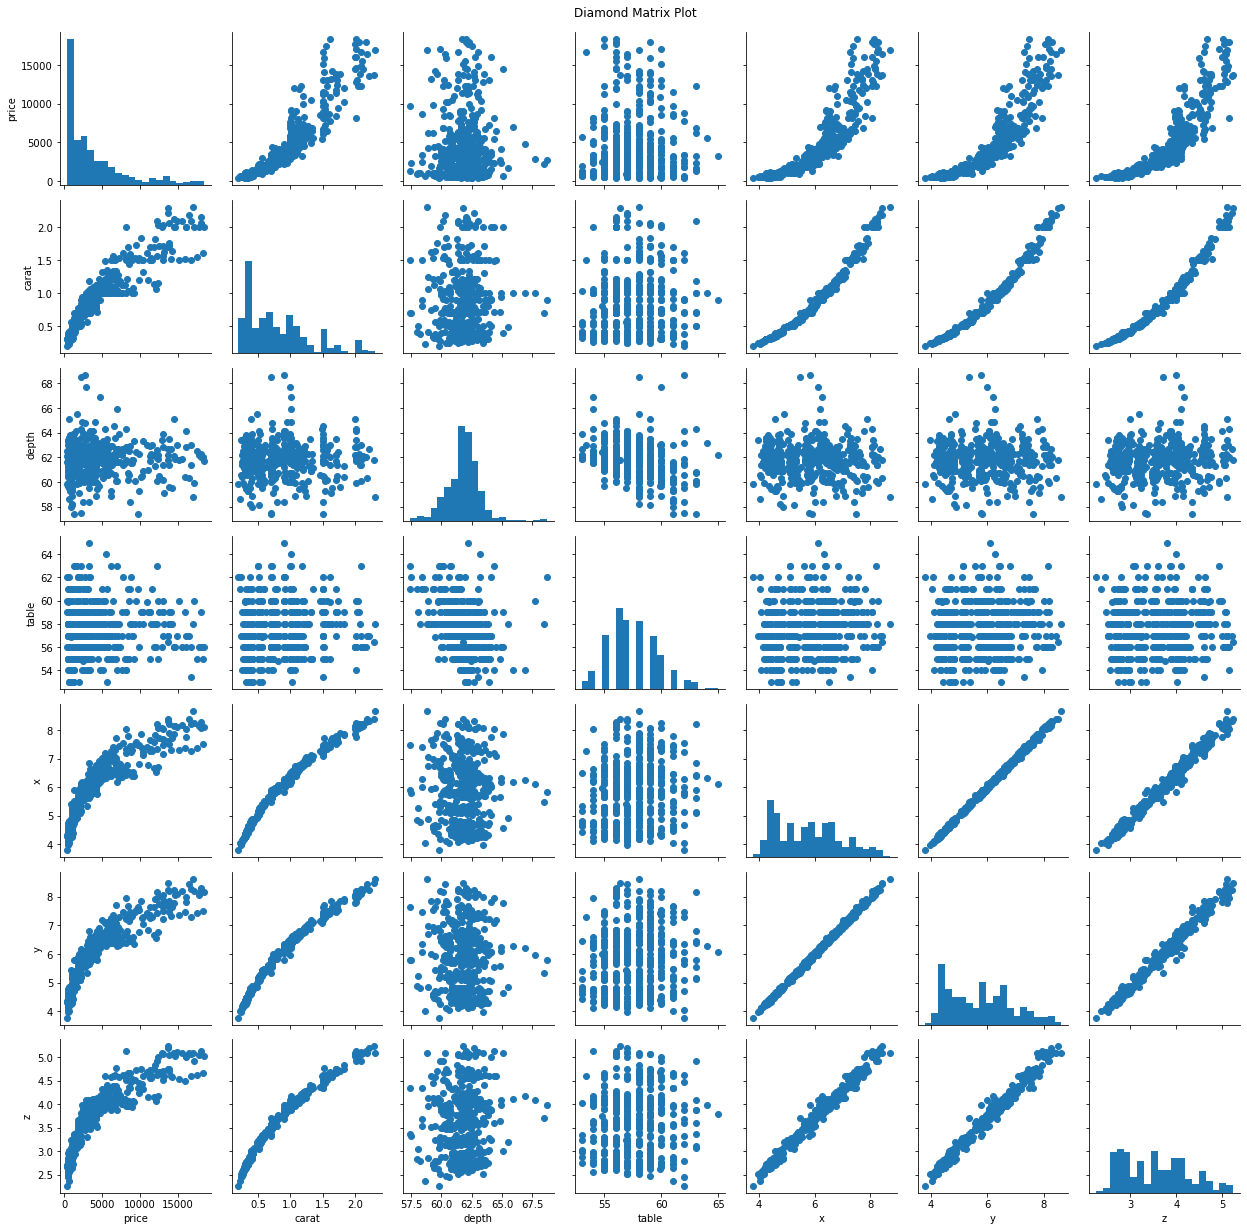

In [17]:
# plot matrix: sample 500 diamonds so that plots are clearer and
# they render faster
samples = np.random.choice(diamonds.shape[0], 500, replace = False)
diamonds_samp = diamonds.loc[samples,:]

g = sb.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
g.fig.subplots_adjust(top=0.96)
g.fig.suptitle('Diamond Matrix Plot');

The 'x', 'y' and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

I want to see how price and carat are related to one another for all of the data, and to plot price on a log scale.

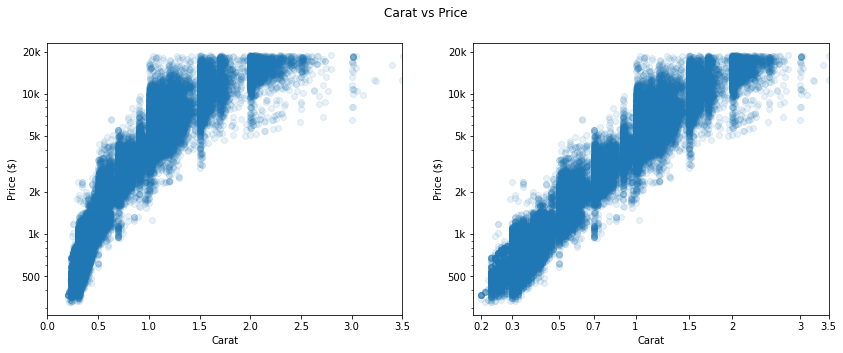

In [18]:
# bivariate plot of price vs. carat

# Cube Transform Function
def cube_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return np.cbrt(x)
    else:
        return x ** 3
    
plt.figure(figsize = [14, 5])
plt.suptitle('Carat vs Price')

plt.subplot(1,2,1)
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 1/10)

plt.xlim([0, 3.5])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Price ($)')

plt.subplot(1,2,2)
sb.regplot(data = diamonds, x = diamonds['carat'].apply(cube_trans), y = 'price', truncate = False,
           fit_reg = False, scatter_kws={'alpha':1/10})

carat_ticks = [0,0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3, 3.5]
plt.xticks(cube_trans(np.array(carat_ticks)), carat_ticks)
plt.xlim([cube_trans(.18), cube_trans(3.5)])
plt.xlabel('Carat')

plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k']);
plt.ylabel('Price ($)');

The plot on the left suggests from the concavity that we might want to also transform the 'carat' variable to see a linear trend. There also appears to be a price ceiling of around 19k in the data.

Plotting one of the size dimensions 'x', 'y' or 'z' against price generates a relationship that looks more linear. To create the plot on the right a function to perform the cube root and its inverse is defined. Carat is preferable to 'x', 'y' or 'z' for interpretability.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity.

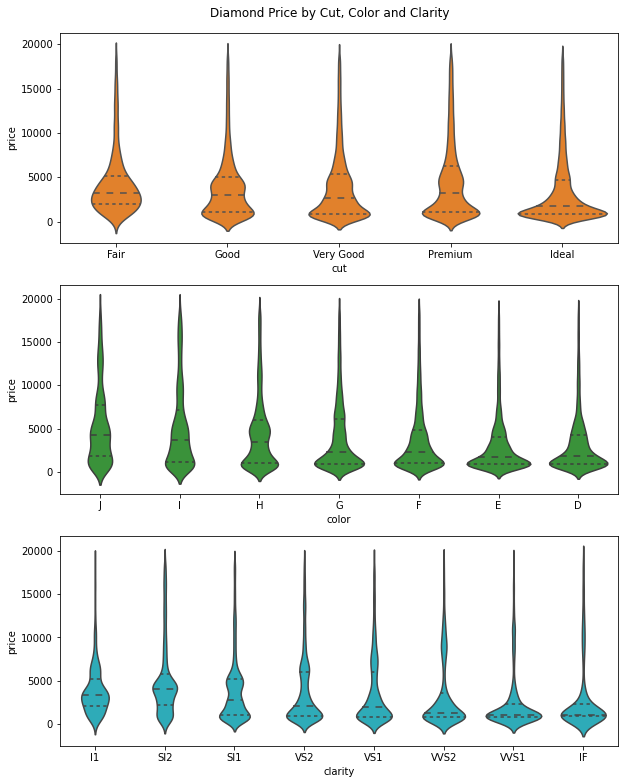

In [19]:
# bivariate plots of price vs. cut, color, clarity

fig, ax = plt.subplots(nrows=3, figsize = [10,12])
fig.subplots_adjust(top=.95)
fig.suptitle('Diamond Price by Cut, Color and Clarity')

sb.violinplot(data=diamonds, x='cut', y='price', inner='quartile', color = sb.color_palette()[1], ax = ax[0])
sb.violinplot(data=diamonds, x='color', y='price', inner='quartile', color = sb.color_palette()[2], ax = ax[1])
sb.violinplot(data=diamonds, x='clarity', y='price', inner='quartile', color = sb.color_palette()[9], ax = ax[2]);

For each ordinal variable, there are multiple modes into which prices appear to fall. Unintuitively, The median price of diamonds tends to look like it decreases with increasing gem quality, however, more of the data is located in the lower-priced modes. If you look closely across increasing quality levels, the modes rise in price - which is the expected effect of quality. This is most easily seen in the clarity plot. This requires further investigation. Next lets look at Carat by Cut, Color and Clarity to see if we can nuance more details.

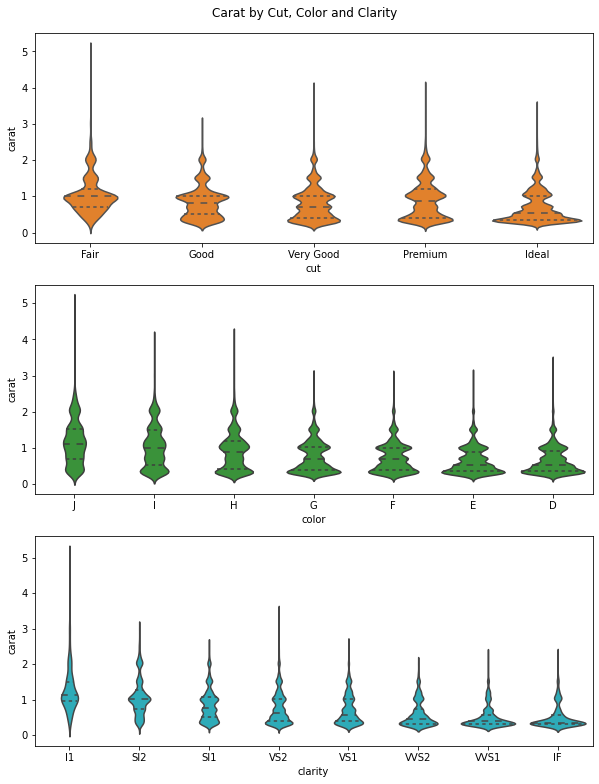

In [20]:
# bivariate plots of Carat vs. cut, color, clarity

fig, ax = plt.subplots(nrows=3, figsize = [10,12])
fig.subplots_adjust(top=.95)
fig.suptitle('Carat by Cut, Color and Clarity')

sb.violinplot(data=diamonds, x='cut', y='carat', inner='quartile', color = sb.color_palette()[1], ax = ax[0])
sb.violinplot(data=diamonds, x='color', y='carat', inner='quartile', color = sb.color_palette()[2], ax = ax[1])
sb.violinplot(data=diamonds, x='clarity', y='carat', inner='quartile', color = sb.color_palette()[9], ax = ax[2]);

These plots shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price.

### Findings so far

Price has a surprisingly high amount of correlation with diamond size (carats), even before transforming the features. An approximately linear relationship is observed when price is plotted on a log scale and carat is plotted with a cube-root transform. The scatterplot that came out of this also suggests that there is an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.

There is also an interesting relationship observed between price and the categorical features. For cut, color, and clarity, lower prices are associated with increasing quality. One of the potentially major interacting factors here is the fact that improved quality levels are associated with smaller diamonds.